# Aumentando las probabilidades en el problema de Monty Hall con computación Cuántica

El objetivo de este notebook es llevar a cabo un analisis del problema de Monty Hall, y relacionarlo con diferentes algoritmo cuánticos. A lo largo del notebook, describiremos el problema, sus características y algoritmo clásico de resolución probabilistica que da el resultado optimo. Para esto, aprovecharemos las cualidades probabilisticas (provenientes de medir estados en superposición) de el computo cuántico para realizar simulaciones.

Luego de entender el problema desde una perspectiva clásica, se procedera a plantear el problema de forma que pueda resolverse con computación cuántica. Diseñaremos diferentes algoritmos y analizaremos sus ventajas y desventajas. Finalmente se concluira cual es el algoritmo cuántico mas conveniente y si este logra superar al mejor algoritmo clásico.

# x. Monty hall en la computación clásica

## x.x Planteando el problema de Monty Hall de forma clásica

El concursante debe elegir una puerta entre tres (todas cerradas); el premio consiste en llevarse lo que se encuentra detrás de la elegida. Se sabe con certeza que tras una de ellas se oculta un automóvil, y tras las otras dos hay cabras. Una vez que el concursante haya elegido una puerta y comunicado su elección a los presentes, el presentador, que sabe lo que hay detrás de cada puerta, abrirá una de las otras dos, en la que habrá una cabra. A continuación, le da la opción al concursante de cambiar, si lo desea, de puerta (tiene dos opciones). ¿Debe el concursante mantener su elección original o escoger la otra puerta? ¿Hay alguna solución que sea la mas conveniente para el?


Definimos una funcion $f(x)=y$,donde $x,y \in \{001,010,100\}$. Esta funcion representa la primera decision de una de las posibles tres puertas, siendo $x$ la cadena de caracteres que representa esta eleccion. La posición donde se encuentre el valor $1$ en la cadena indica cual fue la puerta elegida. La salida $y$ representa cual puerta es la que, luego de nuestra elección, abre Monty.

Supongamos que elegimos la puerta de la izquierda y luego Monty decide abrir la puerta del medio para,posteriormente, darnos la opcion de cambiar a la puerta restante. Este proceso descrito puede representarse como $f(100)=010$

# x. Monty hall en la computación cuántica

Ya habiendo analizado el problema desde una perspectiva clásica, ahora lo veremos desde una cuántica.

## X.X Planteando el problema de monty hall de forma cuántica


Definimos una funcion $f(x)=y$,donde $x,y \in \{001,010,100\}$. Esta funcion representa la primera decision de una de las posibles tres puertas, siendo $x$ la cadena de caracteres que representa esta eleccion. La posición donde se encuentre el valor $1$ en la cadena indica cual fue la puerta elegida. La salida $y$ representa cual puerta es la que, luego de nuestra elección, abre Monty.

Supongamos que elegimos la puerta de la izquierda y luego Monty decide abrir la puerta del medio para,posteriormente, darnos la opcion de cambiar a la puerta restante. Este proceso descrito puede representarse como $f(100)=010$.

Lo mas importante es la función $g(x)$, descrita a continuacion. Esta funcion representa la ultima decision que tomamos de si cambiar o quedarnos en la puerta originalmente elegida. Tiene la forma de $g(x)=z,$ donde $ x \in \{001,010,100\} - {y}, z \in \{0,1\}$. Es decir, $x$ representa la eleccion de si quedarse en la puerta actual o cambiarse. Notemos que el rango de valores de $x$ no incluye a $y$. Esto es porque $y$ es la salida de la funcion $f(x)$, lo que significa que representa a la puerta que Monty abrio y ya no puede ser elegida. La salida $z$ representa si ganamos o no el juego.

Como ya vimos, la solucion clasica de este problema es siempre cambiar de puerta ya que tenemos una probabilidad aproximada de $66\%$ de ganar en ese caso. Para resolverlo de forma cuántica, nuestra idea es incorporar dentro de $g(x)$ un submodulo $g'(x)$ que realice computo cuántico. Este módulo debe ser capaz de obtener la cadena correcta del problema, de forma que sirva de entrada para el siguiente submodulo de $g(x)$, el cual se encarga de decidir si el estado de entrada es correcto.

El modulo $g(x)$ modificado funciona de la siguiente manera:
En vez de usar como cadena de entrada un $x \in \{001,010,100\}$, se usara $| 000 \rangle$. Esta cadena de entrada no entrara directamente al módulo de decisión de $g(x)$, como si sucede en un planteo clásico, sino que primero pasara por $g(x)$. Este módulo, con ayuda de un oráculo que marca cual es el estado correcto, sera capaz de detectar cual es ese estado correcto y darlo como salida de $g'(x)$. la salida $| estado\_correcto\rangle$ ira como entrada al módulo de decisión, que dira con un $100\%$ de probabilidad que ganaste el juego. Es importante notal que el módulo de decisión tambien hace uso del oráculo ya que tambien requiere saber cual es el estado correcto.

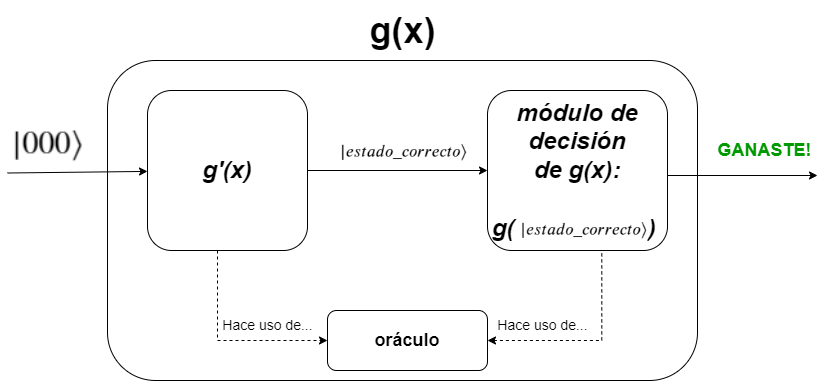

In [4]:
from PIL import Image
img = Image.open(r'C:/Users/54299/Desktop/Facultad/4to anio/Cursos/Escuela de Computacion Cuantica en Español 2023/modelo cuantico.png')
display(img)

## Creando el algoritmo

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,execute,transpile
import numpy as np
from qiskit_aer import Aer,AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(3,3)

Nuestro algoritmo de resolución se ejecuta sobre una cadena de 3 qubits. Primero,se debe generar un submodulo que genere el estado $W$ entre los qubits para representar las posibles elecciones de puertas.

VERSION 1:


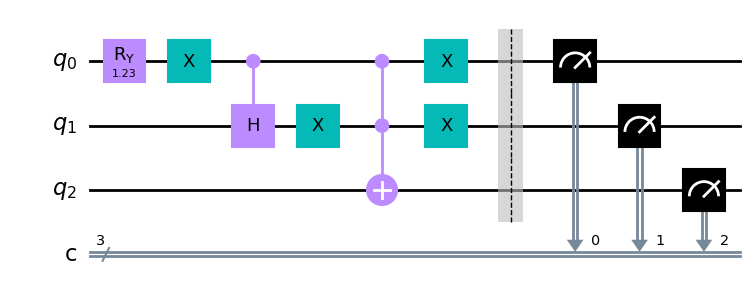

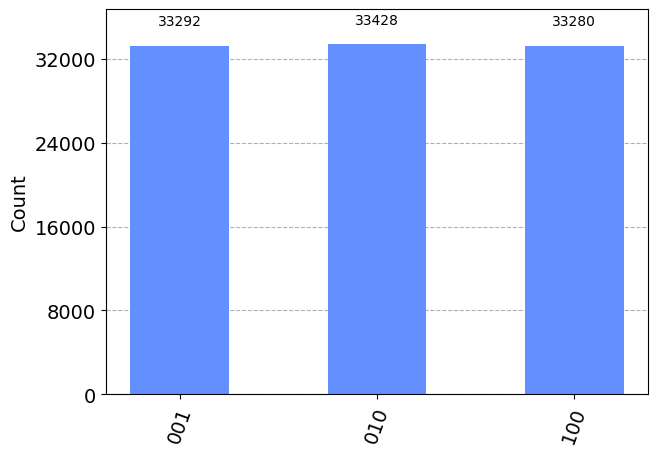

In [2]:
print("VERSION 1:")
qc = QuantumCircuit(3,3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,0)

qc.x(0)
qc.ch(0, 1)
    
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)
    
qc.x(0)

qc.barrier()

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=100000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

Esta es solo una de las formas de generar el estado $W$. Hay 2 variaciones del mismo submodulo que son las siguientes:

VERSION 2


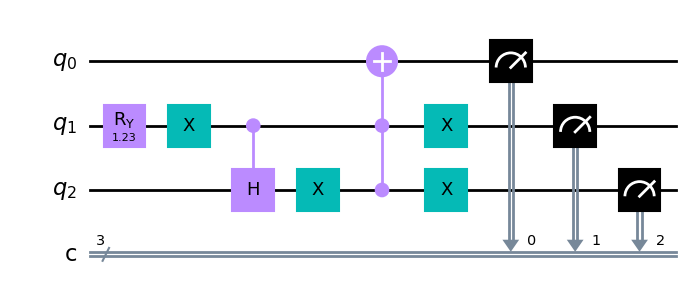

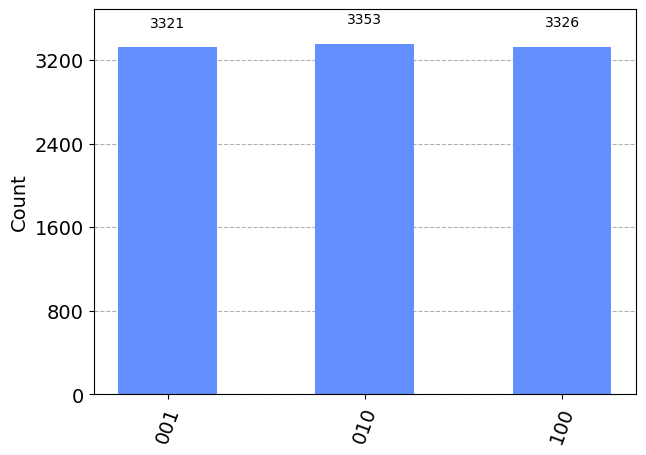

In [3]:
print('VERSION 2')
qc = QuantumCircuit(3,3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,1)

qc.x(1)
qc.ch(1, 2)
    
qc.x(2)
qc.ccx(1, 2, 0)
qc.x(2)
    
qc.x(1)

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

VERSION 3:


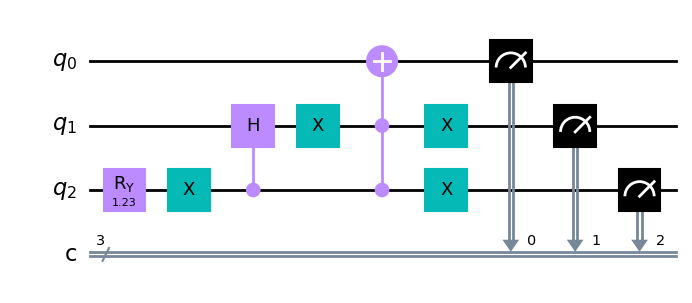

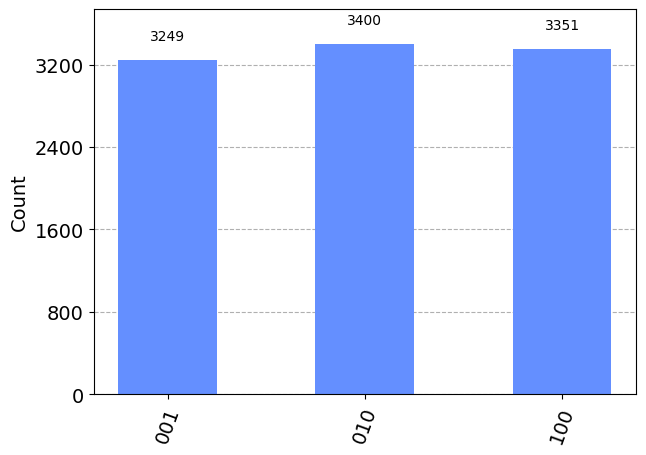

In [4]:
print("VERSION 3:")
qc = QuantumCircuit(3,3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,2)

qc.x(2)
qc.ch(2, 1)
    
qc.x(1)
qc.ccx(2, 1, 0)
qc.x(1)
    
qc.x(2)

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

Llamaremos a estas tres versiones $M_1,M_2,M_3$ respectivamente. Por ahora, usemos solo $M_1$ para continuar desarrollando el algoritmo. Procederemos a ensamblar el submodulo $M_1^\dagger$, que nos permitira realizar uncomputing sobre el algoritmo.

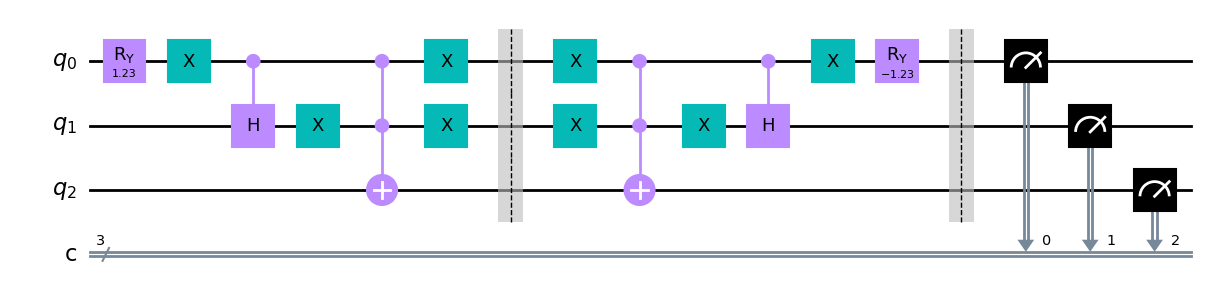

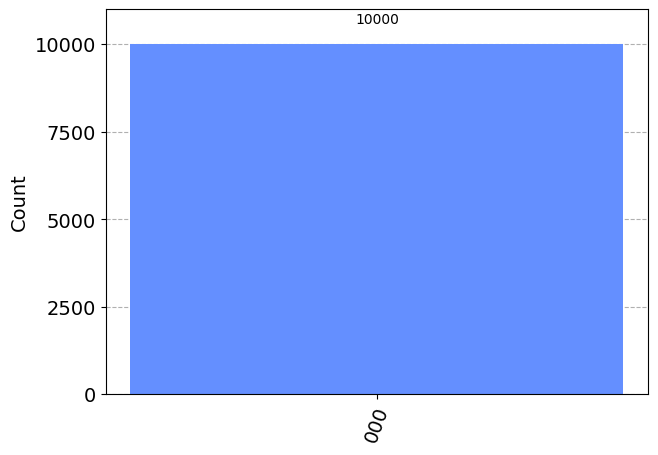

In [21]:
qc = QuantumCircuit(3,3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,0)

qc.x(0)
qc.ch(0, 1)
    
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)
    
qc.x(0)

qc.barrier()

qc.x(0)

qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)

qc.ch(0, 1)
qc.x(0)
qc.ry(-rot,0)


qc.barrier()

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

Ahora viene el paso mas importante. Debemos crear en medio de los modulo $M_1$ y $M_1^\dagger$ un modulo oraculo. Para entender este oraculo, hay que remitirnos a la funcion de los oraculos en los modelos de consulta cuantica. Si no conocen como funciona, puede buscar bibliografia. Es el mismo modelo en el que se basan los algoritmo de Deutsch-Jozsa y el de Bernstein-Vazirani. Resumidamente, el oraculo aplicara un cambio de fase al estado de entrada siempre que representen una solucion correcta. En nuestro caso, el estado que represente haber elegido la puerta correcta.

Empezemos creado un oraculo que marque el estado $|001 \rangle$.

ALGORITMO USANDO M1


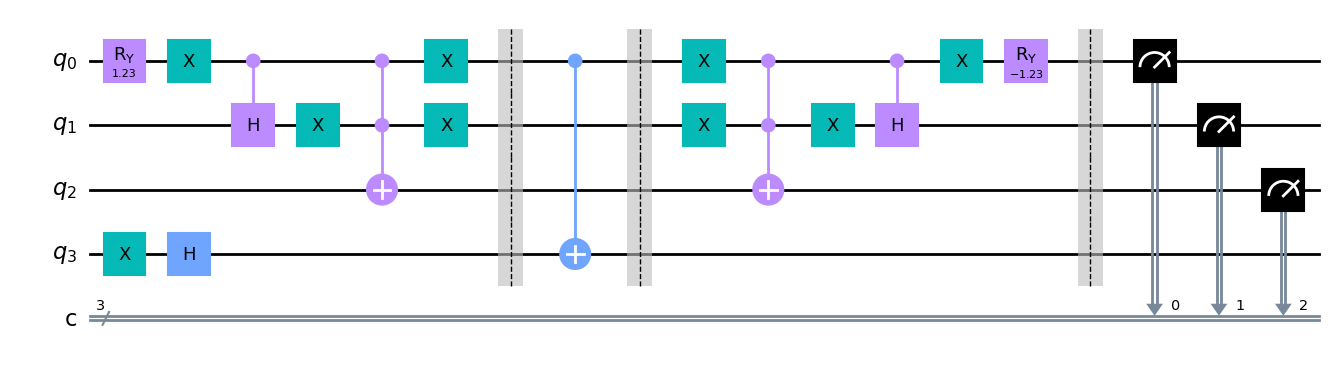

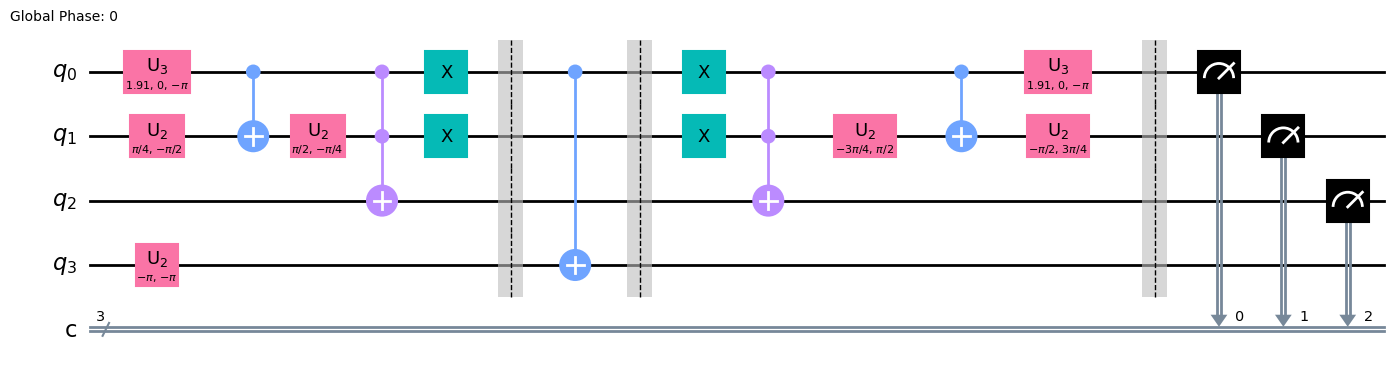

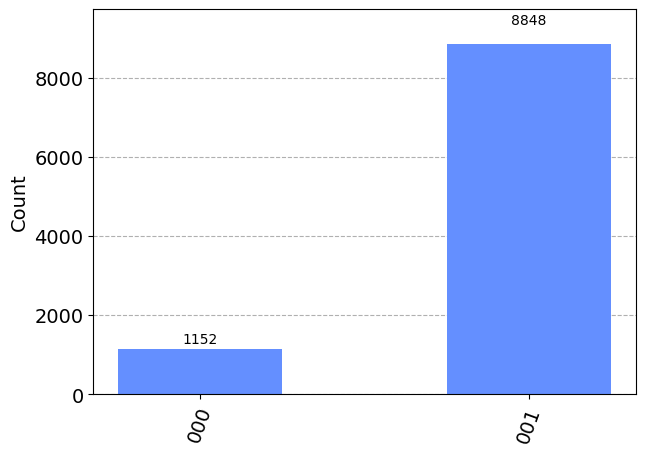

In [6]:
print('ALGORITMO USANDO M1')
#0 = 001; 1 = 010; 2=100
ESTADO_MARCADO = 0

qc = QuantumCircuit(4,3)
qc.x(3)
qc.h(3)

#M1
rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,0)

qc.x(0)
qc.ch(0, 1)
    
qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)
    
qc.x(0)

#ORACULO
qc.barrier()
qc.cx(ESTADO_MARCADO,3)
qc.barrier()

#M2
qc.x(0)

qc.x(1)
qc.ccx(0, 1, 2)
qc.x(1)

qc.ch(0, 1)
qc.x(0)
qc.ry(-rot,0)


qc.barrier()

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
qc = transpile(qc,localSimulator,optimization_level=3)
display(qc.draw('mpl'))

result = execute(qc,localSimulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

A simple vista, pareciera que nuestro algoritmo da resultados exitosos. Con un 88%, nos daría como solución cual es la puerta correcta. Pero el problema viene cuando el estado marcado por el oraculo cambio.

Les recomiendo ir al codigo de arriba, y cambiar el valor de $ESTADO\_MARCADO$ por $1$ y luego por $2$. Veran entonces que el comportamiento del mismo cambia negativamente.

Resumidamente,el algoritmo deja de funcionar. A que se debe esto? Se debe a la version de preparacion de estado $W$ que estamos usando,concretamente,$M_1$. El algoritmo de resolucion que utiliza a $M_1$ funciona unicamente cuando el oraculo marca el estado $|001\rangle$.

Para que el algoritmo funcione cuando el oraculo marca los estados $|010\rangle$ y $|100\rangle$ se deben $M_2$ y $M_3$.

ALGORITMO USANDO M2


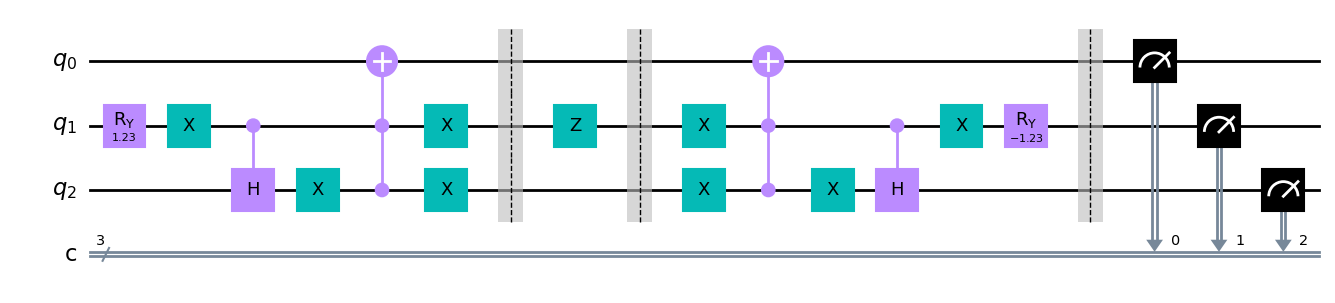

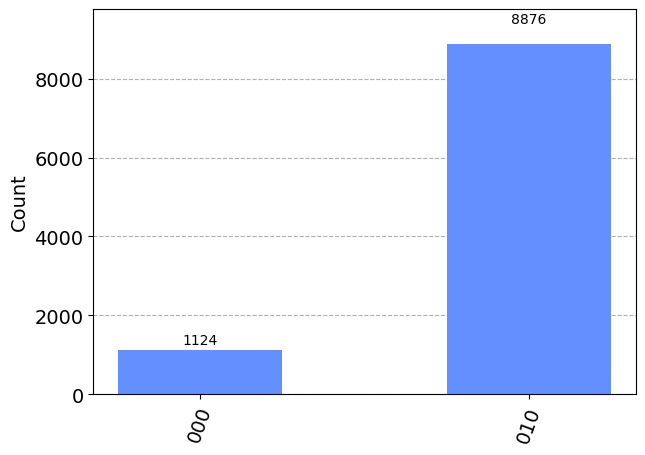

In [23]:
print('ALGORITMO USANDO M2')
#ALGORITMO CON M2
qc = QuantumCircuit(3,3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,1)

qc.x(1)
qc.ch(1, 2)
    
qc.x(2)
qc.ccx(1, 2, 0)
qc.x(2)
    
qc.x(1)

#ORACULO
qc.barrier()
qc.z(1)
qc.barrier()

qc.x(1)

qc.x(2)
qc.ccx(1, 2, 0)
qc.x(2)

qc.ch(1, 2)
qc.x(1)
qc.ry(-rot,1)


qc.barrier()

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

ALGORITMO USANDO M3


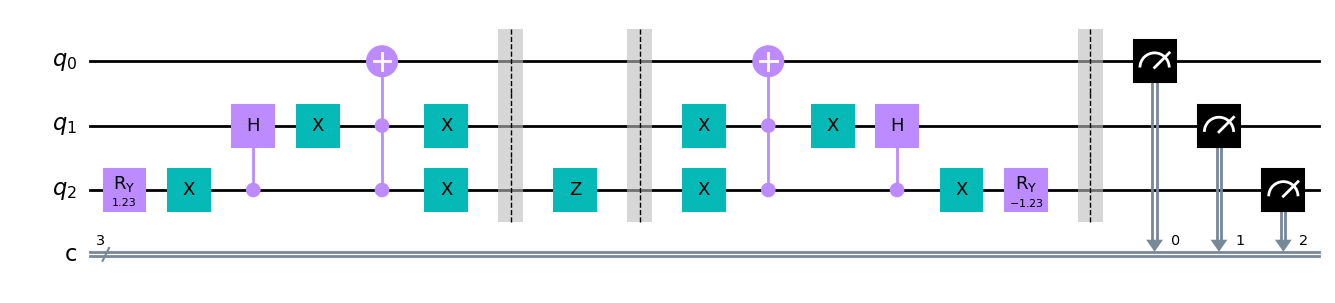

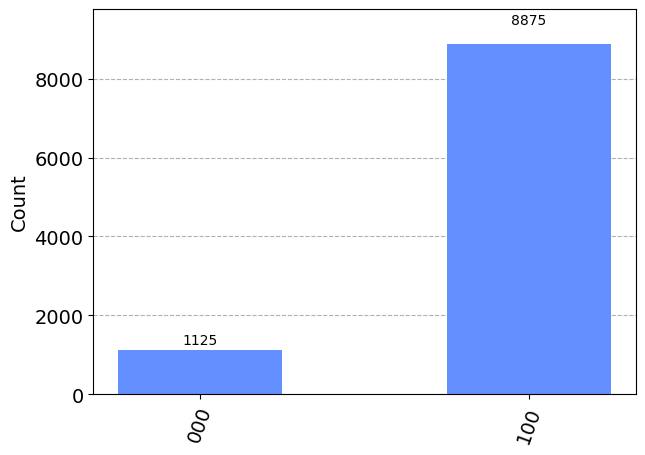

In [24]:
print('ALGORITMO USANDO M3')
ESTADO_MARCADO = 2

# ALGORITMO CON M3
qc = QuantumCircuit(3,3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,2)

qc.x(2)
qc.ch(2, 1)
    
qc.x(1)
qc.ccx(2, 1, 0)
qc.x(1)
    
qc.x(2)

#ORACULO
qc.barrier()
qc.z(ESTADO_MARCADO)
qc.barrier()

qc.x(2)

qc.x(1)
qc.ccx(2, 1, 0)
qc.x(1)

qc.ch(2, 1)
qc.x(2)
qc.ry(-rot,2)


qc.barrier()

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

## Planteando el problema de monty hall de forma cuantica.

Podemos plantear el problema de la siguiente forma. Definimos una funcion $f(x)=y$,donde $x,y \in \{001,010,100\}$. Esta funcion representa la primera decision de una de las posibles tres puertas, siendo $x$ la cadena de caracteres que representa esta eleccion. La salida $y$ representa cual puerta es la que luego abre Monty...
Supongamos que elegimos la puerta de la izquierda y luego Monty decide abrir la puerta del medio para,posteriormente, darnos la opcion de cambiar a la puerta restante. Este proceso descrito puede representarse como $f(100)=010$.

Lo mas importante es la funcion $g(x)$, descrita a continuacion. Esta funcion representa la ultima decision que tomamos de si cambiar o quedarnos en la misma puerta. Tiene la forma de $g(x)=z,$ donde $ x \in \{001,010,100\} - {y}, z \in \{0,1\}$. Es decir, x representa la eleccion de si quedarse en la puerta actual o cambiarse. Notemos que el rango de valores de $x$ no incluye a $y$. Esto es porque $y$ es la salida de la funcion $f(x)$, lo que significa que representa a la puerta que Monty abrio y ya no puede ser elegida. La salida $z$ representa si,finalmente, ganamos o no el juego.

Como ya vimos, la solucion clasica de este problema es siempre cambiar de puerta ya que tenemos una probabilidad aproximada de $66\%$ de ganar en ese caso. Para resolverlo de forma cuántica, nuestra idea es incorporar dentro de $g(x)$ un submodulo $g'(x)$ que realice computo cuántico. Este módulo debe ser capaz de obtener la cadena correcta del problema, de forma que sirva de entrada para el siguiente submodulo de $g(x)$, el cual se encarga de decidir si el estado de entrada es correcto.

El modulo $g(x)$ modificado funciona de la siguiente manera:
En vez de usar como cadena de entrada un $x \in \{001,010,100\}$, se usara $| 000 \rangle$. Esta cadena de entrada no entrara directamente al módulo de decisión de $g(x)$, como si sucede en un planteo clásico, sino que primero pasara por $g(x)$. Este módulo, con ayuda de un oráculo que marca cual es el estado correcto, sera capaz de detectar cual es ese estado correcto y darlo como salida de $g'(x)$. la salida $| estado\_correcto\rangle$ ira como entrada al módulo de decisión, que dira con un $100\%$ de probabilidad que ganaste el juego. Es importante notal que el módulo de decisión tambien hace uso del oráculo ya que tambien requiere saber cual es el estado correcto.

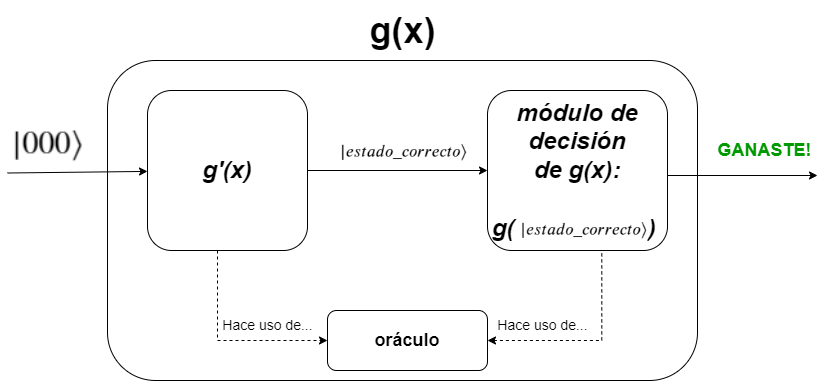

In [3]:
from PIL import Image
img = Image.open(r'C:/Users/54299/Desktop/Facultad/4to anio/Cursos/Escuela de Computacion Cuantica en Español 2023/modelo cuantico.png')
display(img)

Si bien la idea teorica de esta modificación suena muy prometedora, para que su funcionamiento pueda llevarse a la práctica debemos crear a $g'(x)$ de forma que nos garantice(o al menos, que tenga una alta probabilidad) obtener $|estado\_correcto \rangle$. Para eso, mostraremos los diseños que $g'(x)$ que hemos pensado.

## Algoritmo 1:

El mayor problema para garantizar esto es que la probabilidad de $88\%$ depende de armar $g'(x$) con los modulo $M_x$ y $M_x^\dagger$ correcto.Como se vio en la primera seccion, si no se eligen los modulos correctamente, el algoritmo pierde gran parte de su probabilidad de exito. Desarrollare un capitulo tratando de solucionar ese problema a continuacion.

## Variantes del algoritmo anterior

Una opcion para solucionar la necesidad de saber el $M_x$ y $M_x\dagger$ que debe usarse, es la siguiente:

En vez de usar $M_x\dagger$ para hacer uncomputing con el estado $W$ marcado por el oraculo, usaremos simplemente una barrera de compuertas $H$. Con esto, el algoritmo funciona indiferentemente del $M_x$ que se use(recordemos que $M_x\dagger$ no se usa mas por que se reemplaza por los $H$. La desventaja de esta solucion es que la fiabilidad del algoritmo baja de un $88%$ a un $75\%$. Aun asi, esta fiabilidad es mayor al $66\%$ de la solucion clasica.

Para probar esta variacion, cambien la variable ESTADO_MARCADO por valores 0,1,2 para ver que funciona todo correctamente.

ALGORITMO USANDO M3 Y BARRERAS DE H PARA UNCOMPUTING


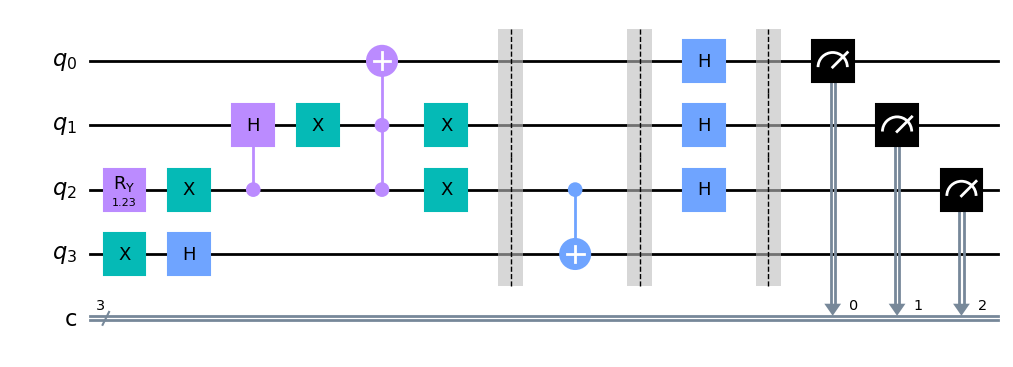

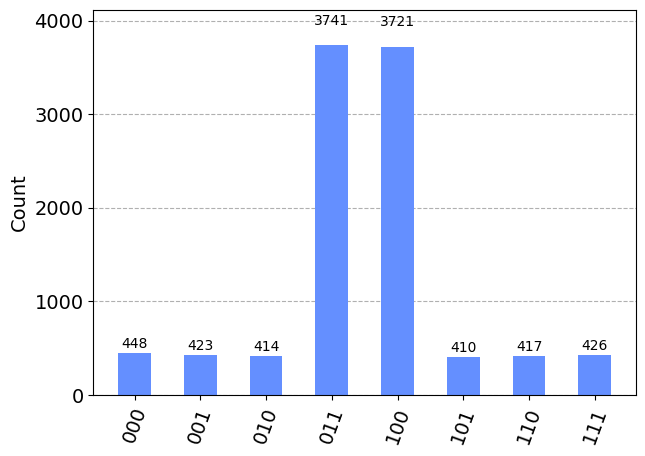

In [13]:
print('ALGORITMO USANDO M3 Y BARRERAS DE H PARA UNCOMPUTING')
ESTADO_MARCADO = 2

# ALGORITMO CON M3
qc = QuantumCircuit(4,3)
qc.x(3)
qc.h(3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,2)

qc.x(2)
qc.ch(2, 1)
    
qc.x(1)
qc.ccx(2, 1, 0)
qc.x(1)
    
qc.x(2)

#ORACULO
qc.barrier()
qc.cx(ESTADO_MARCADO,3)
qc.barrier()

#---BARRERA H---
qc.h(range(3))
#---BARRERA H---



qc.barrier()

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
display(plot_histogram(counts))

Una segunda variacion involucra mezclar tanto $M_x\dagger$ como la barrera de compuertas $H$. Esta variación permite una probabilidad de exito del $79\%$, es decir, una mejora del $4\%$ respecto a la prinera variación.

ALGORITMO USANDO M3 Y M3Dagger + BARRERAS DE H PARA UNCOMPUTING


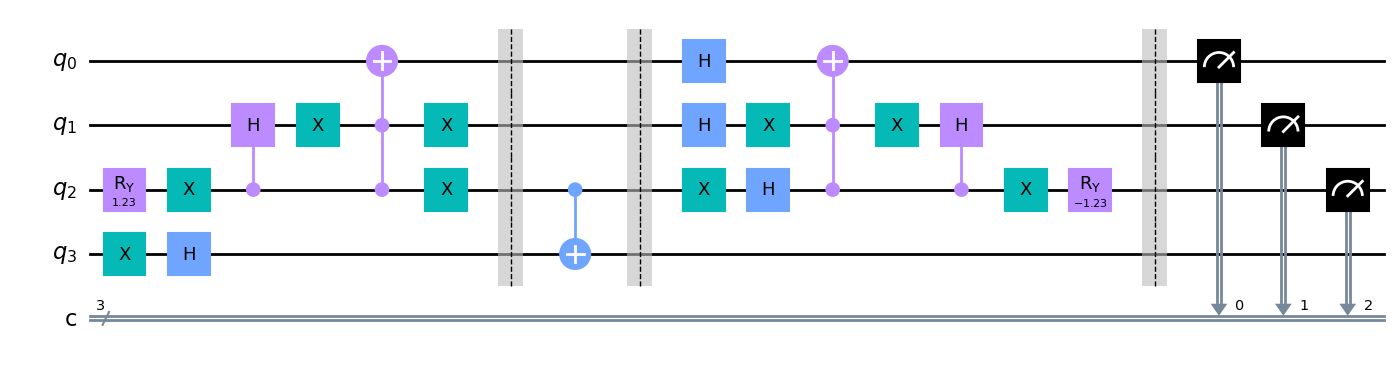

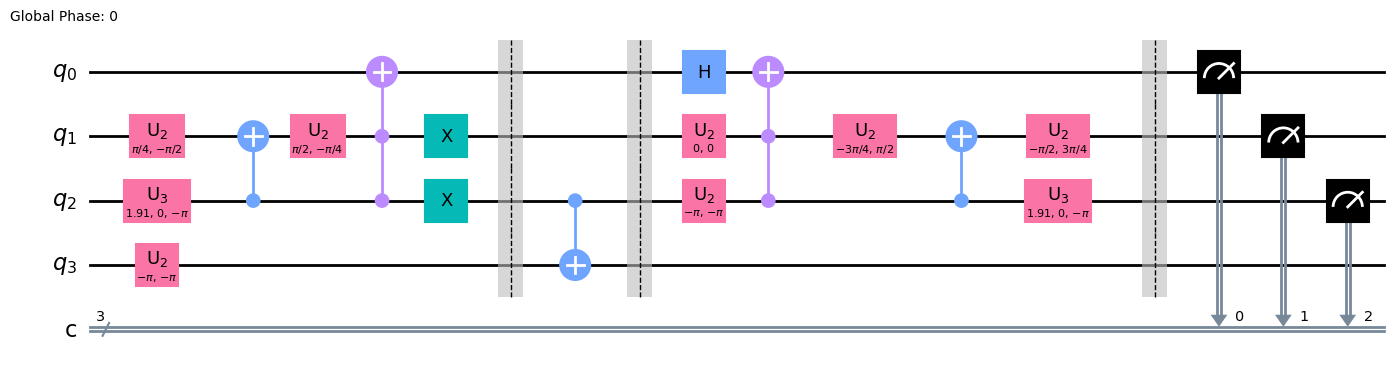

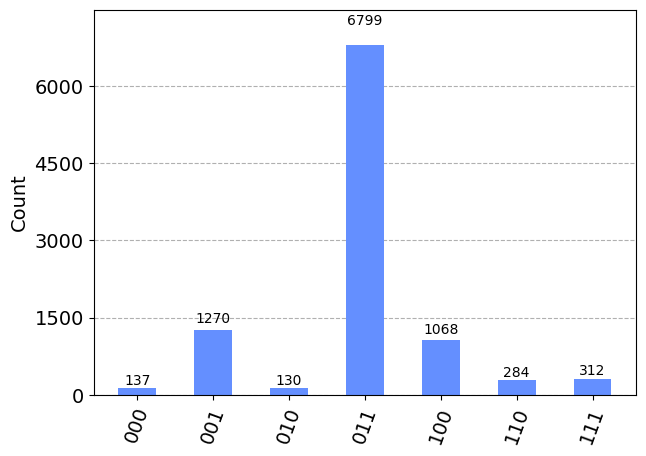

In [15]:
print('ALGORITMO USANDO M3 Y M3Dagger + BARRERAS DE H PARA UNCOMPUTING')
ESTADO_MARCADO = 2

# ALGORITMO CON M3
qc = QuantumCircuit(4,3)
qc.x(3)
qc.h(3)

rot = 2* np.arcsin(1/np.sqrt(3))
qc.ry(rot,2)

qc.x(2)
qc.ch(2, 1)
    
qc.x(1)
qc.ccx(2, 1, 0)
qc.x(1)
    
qc.x(2)

#ORACULO
qc.barrier()
qc.cx(ESTADO_MARCADO,3)
qc.barrier()

qc.x(2)

#---BARRERA H---
qc.h(range(3))
#---BARRERA H---

qc.x(1)
qc.ccx(2, 1, 0)
qc.x(1)

qc.ch(2, 1)
qc.x(2)
qc.ry(-rot,2)



qc.barrier()

qc.measure(range(3),range(3))
display(qc.draw('mpl'))

localSimulator = Aer.get_backend('qasm_simulator')
qc = transpile(qc,localSimulator,optimization_level=3)
display(qc.draw('mpl'))

result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
display(plot_histogram(counts))

## Solucion con 100% de efectividad reduciendolo al problema "The lazy Colleague".

En base a investigación, encontramos el trabajo de Diego Emilio sobre el problema "The Lazy Colleague". En su trabajo, Emilio logra resolver este problema con una unica ejecución de una versión modifica del algoritmo de busqueda de Grover. Lo importante de este trabajo es que podemos reducir nuestro problema de Monty Hall al problema analizado por Emilio.

El problema enuncia que dado 4 trabajadores, sabemos que hay uno de ellos que no esta aportando en su equipo de trabajo. Ademas, sabemos que 

In [76]:
def w_cir(n):
    
    prob_amp = np.sqrt(1/n)
    rot_ang = 2*np.arccos(prob_amp)
    
    qc_w = QuantumCircuit(n,name="Preparacion estado W") 
    qc_w.x(n-1)
    
    for i in range(n-2,-1,-1):
        comp_amp = np.sqrt((i+2)/n)
        rot_ang = 2*np.arccos(prob_amp/(comp_amp))
        qc_w.cry(rot_ang,i+1,i)
        qc_w.cx(i,i+1)
    
    return qc_w

In [87]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Statevector

def oraculo(n,estado_marcado):
    
    # creo el marcador de estado del oraculo
    mcx = XGate().control(n-1)
    
    # lista de estados no marcados, sobre los que se aplicara la compuerta X y sera controladores del marcador de estado
    estados_no_marcados = []
    
    qc = QuantumCircuit(n+1,name="Oraculo")
    
    #Se obtiene cada estado no marcado y se le aplica compuerta X
    for i in range(n):
        if i != estado_marcado:
            qc.x(i)
            estados_no_marcados.append(i)
    
    #Obtenemos un arreglo con los qubits que se usaran en el mcx. Estos son los estados no marcados + ancilla
    mcx_qubits = estados_no_marcados.copy()
    mcx_qubits.append(n)
    
    #aplicamos el mcx
    qc.append(mcx,mcx_qubits)
    
    #para cada estado no marcado volvemos a aplicar x.
    for i in estados_no_marcados:
        qc.x(i)
    
    return qc
qc = w_cir(3)
display(Statevector(qc))

Statevector([0.        +0.j, 0.57735027+0.j, 0.57735027+0.j,
             0.        +0.j, 0.57735027+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


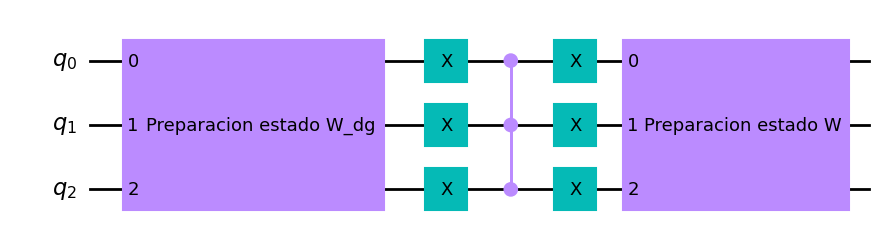

In [88]:
from qiskit.circuit.library import ZGate

def diffuser(n):
    
    mcz = ZGate().control(n-1)
    qc = QuantumCircuit(n,name="diffuser")
    
    qc.append(w_cir(n).inverse(),range(n))
    
    for i in range(n):
        qc.x(i)
    qc.append(mcz,range(n))
    for i in range(n):
        qc.x(i)
    
    qc.append(w_cir(n),range(n))
    
    return qc

qc=diffuser(3)
display(qc.draw('mpl'))



cantidad de iteraciones de oraculo+diffuser: 1

-------------------------------------------------------------------------------------------------------------------
CIRCUITO:


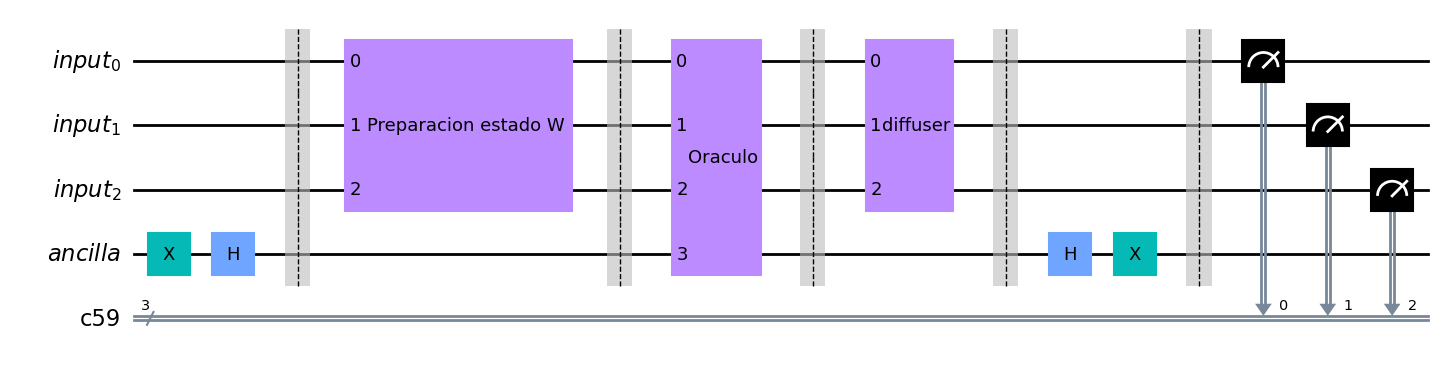


-------------------------------------------------------------------------------------------------------------------

CIRCUITO DESCOMPUESTO:


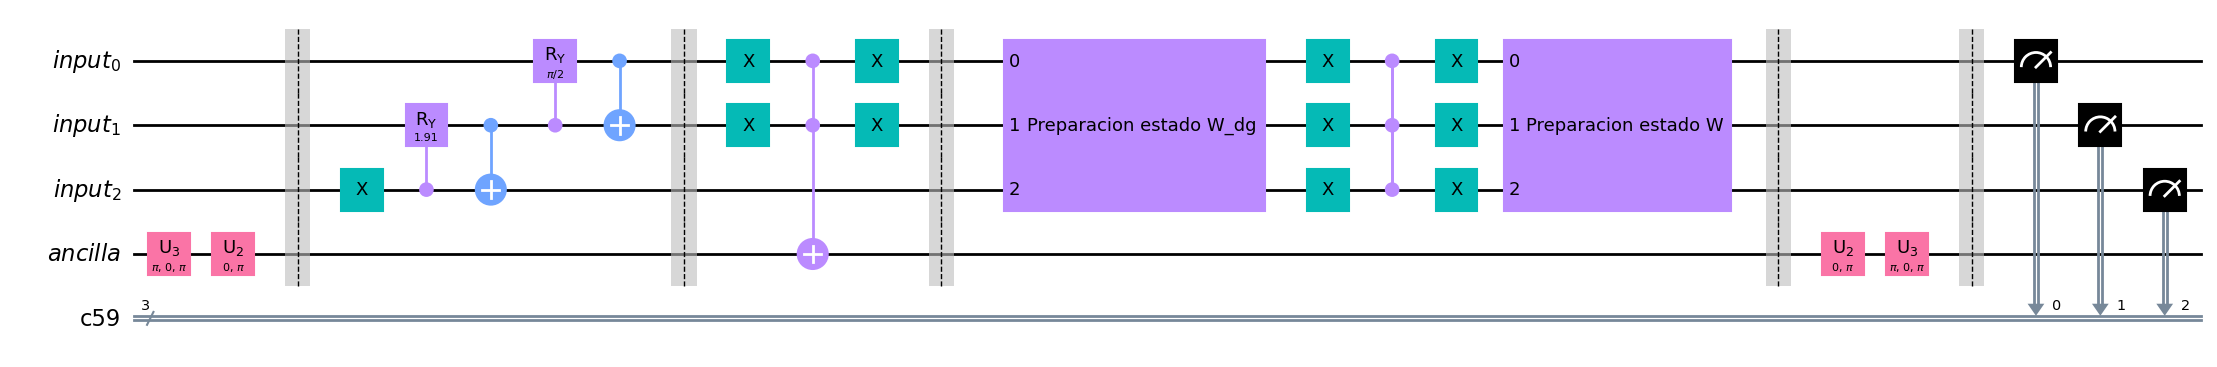


-------------------------------------------------------------------------------------------------------------------

RESULTADOS:


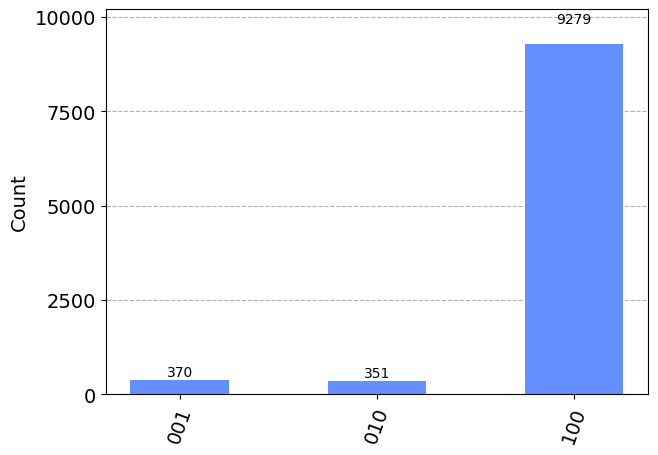

In [126]:
from numpy import pi,arcsin,sqrt

n=3

#el estado marcado indica en que qubit el valor es 1. Recuerda que el rango de qubits posibles es de 0 a n-1.
estado_marcado = 2

#calculo de cantidad de iteraciones
a = (pi/4) 
b = 1/arcsin(sqrt(1/n))
c=1/2
cant_iteraciones = round(a * b - c)
print()
print('cantidad de iteraciones de oraculo+diffuser:',cant_iteraciones)
print()
print('-------------------------------------------------------------------------------------------------------------------')
qr = QuantumRegister(n,name="input")
ancilla = QuantumRegister(1,name="ancilla")
qc = ClassicalRegister(n)
qc = QuantumCircuit(qr,ancilla,qc)

# preparacion del estado |-> en ancilla
qc.x(n)
qc.h(n)
qc.barrier()

# preparacion del estado W
qc.append(w_cir(n),range(n))
qc.barrier()

for i in range(cant_iteraciones):
    # oraculo
    qc.append(oraculo(n,estado_marcado),range(n+1))
    qc.barrier()

    # diffuser
    qc.append(diffuser(n),range(n))
    qc.barrier()


qc.h(n)
qc.x(n)
qc.barrier()


qc.measure(range(n),range(n))
print('CIRCUITO:')
display(qc.draw('mpl'))
print()
print('-------------------------------------------------------------------------------------------------------------------')
print()
print('CIRCUITO DESCOMPUESTO:')
display(qc.decompose().draw('mpl',fold=50))
print()
print('-------------------------------------------------------------------------------------------------------------------')
print()

print('RESULTADOS:')
localSimulator = Aer.get_backend('qasm_simulator')
result = execute(qc, localSimulator, shots=10000).result()
counts = result.get_counts(qc)
display(plot_histogram(counts))